# Projeto de Técnicas de Programação I
#### EQUIPE
* Camila de Jesus
* Janaina Oliveira
* Pedro Pilon
* Ricardo Jeferson da Silva Francisco
* Tamires Torres

#### CONTEXTUALIZAÇÃO

Você trabalha em uma consultoria de dados que foi contratada para realizar a distribuição de materiais didáticos nas escolas da cidade do Rio de Janeiro. Sua missão é realizar tratamentos nos dados de acordo com as normas de padrão definidas pelo cliente e encontrar qual a melhor rota que um caminhão deve realizar para entregar os materiais didáticos de forma a otimizar o seu percurso.

Para esse projeto você recebeu três arquivos:
- escolas.csv: contém os dados das escolas
- subprefeituras.csv: contém dados de quais bairros pertem a cada subprefeitura
- material_didatico.csv: contém a quantidade de material didático que cada escola deve receber

Como produto final, você deve entregar:
- um arquivo csv no as linhas já estarão ordenas de acordo com a rota a ser seguida. Além disso, os dados devem estar no padrão especificado abaixo e contendo as seguintes colunas: id da escola, nome da escola, tipo da escola (EM, CIEP ou colégio), logradouro da entrega, número, bairro, subprefeitura, latitude, longitude e quantidade de material didático que deve ser entregue. O logradouro da escola deve estar em uma coluna diferente do número;
- um arquivo csv com a quantidade total de material escolar por subprefeitura para que sejam contabilizados os custos por subprefeitura

#### ATIVIDADES
Como padrão dos dados, considere:
- nome das colunas em snake_case
- strings não devem conter acentos
- todas as strings devem estar em maiúsculo
- padronização do nome dos logradouros sem abreviação (Ex: R. deve estar como Rua)
- latitude e longitude devem conter apenas 5 casas decimais
- os ids da escola devem todos ser strings com 3 caracteres (Ex: '024')

#### DESAFIO:

Entregar um plot com a representação da melhor rota que você encontrou, por exemplo:
<img src="rota.png"  width="70%" height="40%">

Obs: O otimizador não é a parte mais importante do projeto. Foque no tratamento dos dados e se preciso, pode reduzir a quantidade de escolas para rodar o otimizador.

## Primeira Etapa, Extração,e análise da constituição dos dados

Neste ponto, que seira equivalente a tratativa de camada especializada _Bronze_ temos as seguintes tratativas a executar:
* importar as ferramenteas necessárias para os trabalhos;
* conversão dos dados de csv para dataframe;
* normatizar todas as colunas das tabelas, seguindo a regra negócio vigente do cliente _(tal passo se faz necessário pois se os nomes de colunas estiverem sem nenhuma padronagem, isso dificulta o trabalho, tanto com Pandas quanto com SQL)_;
* padronizar os tipos de dados em cada coluna, conforme a regra de negócio vigente;
* Analisar a existencia e persistÊncia de nulidades e duplicatas, para posterior retirada ou maniutenção ou mesclagem, conforme o caso;
* exportar com trabalhos efetivos nos formatos pertinentes, e conforme as ferramentas utilizadas _(importate pois, em caso de alteração das regras de negócio, as alterações podem ser aplicadas com menotr índice de retrabalho)_;
  

1. Importando as bibliotecas

In [ ]:
!pip install ortools

  Obtaining dependency information for ortools from https://files.pythonhosted.org/packages/a6/51/59619edb09f37fa6973ce5aebf7c9ea248eb4126a9f1c4980a516e81e258/ortools-9.8.3296-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for absl-py>=2.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for protobuf>=4.25.0 from https://files.pythonhosted.org/packages/15/db/7f731524fe0e56c6b2eb57d05b55d3badd80ef7d1f1ed59db191b2fdd8ab/protobuf-4.25.3-cp37-abi3-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 8.9 MB/s eta 0:00:000m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 14.4 MB/s eta 0:00:00


In [ ]:
import math
import pandas as pd
import numpy as np
from unidecode import unidecode
import matplotlib.pyplot as plt

#altera a configuração do pandas para que mostre todas as linhas de um df. Aqui, como os dfs não são tão grandes, é util
pd.options.display.max_rows = None


def remover_acentos(texto):
    return unidecode(texto)

2. Importando os CSV

In [ ]:
escolas = pd.read_csv("./Arqiuvos CSV/Originais/escolas.csv")
material_didatico = pd.read_csv("./Arqiuvos CSV/Originais/material_didatico.csv")
subprefeituras = pd.read_csv("./Arqiuvos CSV/Originais/subprefeituras.csv")

3. Tratamento dos dados: nome das colunas em snake_case (regra de negócio atual)

* ESCOLAS

In [ ]:
# Visualizando os dados iniciais
escolas.head(2)

,id,Escolas_Postos,BAIRRO,ENDEREÇO,lat,lon
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,"-22,889574","-43,236202"


In [ ]:
# Convertendo os nomes das colunas para minúsculas
escolas.columns = escolas.columns.str.lower()

escolas.head(2)

,id,escolas_postos,bairro,endereço,lat,lon
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,"-22,889574","-43,236202"


In [ ]:
# Trocando 'ç' por 'c' nos nomes das colunas
snake_case_coluna = {coluna: coluna.replace('ç', 'c') for coluna in escolas.columns}
escolas.rename(columns=snake_case_coluna, inplace=True)

escolas.head(2)

,id,escolas_postos,bairro,endereco,lat,lon
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,"-22,889574","-43,236202"


In [ ]:
escolas.columns

Index(['id', 'escolas_postos', 'bairro', 'endereco ', 'lat', 'lon'], dtype='object')

In [ ]:
# remover o espaço extra no nome da coluna endereco

escolas.rename (columns= {'endereco ': 'endereco'}, inplace = True)

In [ ]:
escolas.columns

Index(['id', 'escolas_postos', 'bairro', 'endereco', 'lat', 'lon'], dtype='object')

In [ ]:
#Aplicando as regras solicitadas a coluna id
# converte pra int, depois pra str e depois preenche o zero à esqueda com zfill
escolas['id'] = escolas['id'].astype(int).astype(str).apply(lambda x: x.zfill(3))

escolas


,id,escolas_postos,bairro,endereco,lat,lon
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,"-22,889574","-43,236202"
2,483,EM CELESTINO SILVA,CENTRO,"R. do Lavradio, 56","-22,909293","-43,183579"
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,Praça Argentina 20,"-22,897629","-43,227456"
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,Praça Condessa Paulo de Frontin 45,"-22,924412","-43,208579"
5,017,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"R. Barão da Torre, 90","-22,983332","-43,199036"
6,055,EM SANTA CATARINA,SANTA TERESA,Rua Eduardo Santos 38,"-22,915535","-43,191588"
7,490,E.M TIA CIATA,CENTRO,Avenida Presidente Vargas S/Nº,"-22,907123","-43,195068"
8,600,EM URUGUAI,BENFICA,Rua Ana Néri 192,"-22,898488","-43,237756"
9,089,EM MARIO CLAUDIO,RIO COMPRIDO,"R. Haddock Lobo, 148","-22,917233","-43,211044"


In [ ]:
#Converter a força os valores stringficados em Quantidades, se houverem
# O argumento downcast = 'float' obriga os numeros a serem flutuantes (é o padrão, mas pode ser necessário forçã-ĺos)
lat_convertida = pd.to_numeric(escolas['lat'], errors='coerce', downcast='float')
lat_convertida.dtypes


dtype('float64')

In [ ]:
lon_convertida = pd.to_numeric(escolas['lon'], errors='coerce', downcast='float')
lon_convertida.dtypes

dtype('float64')

* MATERIAL DIDÁTICO

In [ ]:
# Visualizando os dados iniciais
material_didatico.head(2)

,id,Quantidade
0,178,20
1,634,121


In [ ]:
# Convertendo os nomes das colunas para minúsculas
material_didatico.columns = material_didatico.columns.str.lower()

material_didatico.head(2)

,id,quantidade
0,178,20
1,634,121


In [ ]:
material_didatico.columns

Index(['id', 'quantidade'], dtype='object')

In [ ]:
#Converter a força os valores stringficados em Quantidades, se houverem
#Necessário pois no futuro serão usadas operações matemáticas com tais quantidades
coluna_convertida = pd.to_numeric(material_didatico['quantidade'], errors='coerce')
linhas_nao_numericas = material_didatico[coluna_convertida.isna()]
linhas_nao_numericas

,id,quantidade
14,413,''
31,60,'NaN'
38,429,NaN
67,260,'397'
76,91,'NaN'
85,412,'395'
99,492,NaN
117,687,NaN
140,297,' '
148,215,NaN


In [ ]:
# converter as linhas 67 e 85 para valores numericos
material_didatico.loc[85, 'quantidade'] = 395
material_didatico.loc[67, 'quantidade'] = 397

# Confiorma novamente os nao numericos
coluna_convertida = pd.to_numeric(material_didatico['quantidade'], errors='coerce')
linhas_nao_numericas = material_didatico[coluna_convertida.isna()]
linhas_nao_numericas

,id,quantidade
14,413,''
31,60,'NaN'
38,429,NaN
76,91,'NaN'
99,492,NaN
117,687,NaN
140,297,' '
148,215,NaN


In [ ]:
#Aplicando as regras solicitasdas a coluna id
# converte pra int, depois pra str e depois preenche o zxero faltaten com zfill
material_didatico['id'] = material_didatico['id'].astype(int).astype(str).apply(lambda x: x.zfill(3))
material_didatico

,id,quantidade
0,178,20
1,634,121
2,483,220
3,476,190
4,132,67
5,410,397
6,055,92
7,490,578
8,600,591
9,089,473


In [ ]:
# conferindo a tarefa
material_didatico.iloc[76]

id              091
quantidade    'NaN'
Name: 76, dtype: object

In [ ]:
material_didatico.iloc[31]

id              060
quantidade    'NaN'
Name: 31, dtype: object

* SUBPREFEITURAS

In [ ]:
# Visualizando os dados iniciais
subprefeituras.head(2)

,nome,subprefeitura
0,Santo Cristo,Centro
1,Gamboa,Centro


In [ ]:
subprefeituras.columns

Index(['nome', 'subprefeitura'], dtype='object')

In [ ]:
# conversão das colunas para strings
subprefeituras['nome'] = subprefeituras['nome'].astype(str)
subprefeituras['subprefeitura'] = subprefeituras['subprefeitura'].astype(str)

4. Conferência dos trabalahos e salvar os dados com as trataticas_'Bronze"_

In [ ]:
escolas

,id,escolas_postos,bairro,endereco,lat,lon
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,"-22,889574","-43,236202"
2,483,EM CELESTINO SILVA,CENTRO,"R. do Lavradio, 56","-22,909293","-43,183579"
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,Praça Argentina 20,"-22,897629","-43,227456"
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,Praça Condessa Paulo de Frontin 45,"-22,924412","-43,208579"
5,017,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"R. Barão da Torre, 90","-22,983332","-43,199036"
6,055,EM SANTA CATARINA,SANTA TERESA,Rua Eduardo Santos 38,"-22,915535","-43,191588"
7,490,E.M TIA CIATA,CENTRO,Avenida Presidente Vargas S/Nº,"-22,907123","-43,195068"
8,600,EM URUGUAI,BENFICA,Rua Ana Néri 192,"-22,898488","-43,237756"
9,089,EM MARIO CLAUDIO,RIO COMPRIDO,"R. Haddock Lobo, 148","-22,917233","-43,211044"


In [ ]:
material_didatico

,id,quantidade
0,178,20
1,634,121
2,483,220
3,476,190
4,132,67
5,410,397
6,055,92
7,490,578
8,600,591
9,089,473


In [ ]:
subprefeituras

,nome,subprefeitura
0,Santo Cristo,Centro
1,Gamboa,Centro
2,Saúde,Centro
3,Caju,Centro
4,Centro,Centro
5,Lapa,Centro
6,Rio Comprido,Centro
7,Cidade Nova,Centro
8,Catumbi,Centro
9,Estácio,Centro


In [ ]:
escolas.to_csv('./Arqiuvos CSV/Primeira fase - Bronze/escolas_bronze.csv', index=False)

In [ ]:
material_didatico.to_csv('./Arqiuvos CSV/Primeira fase - Bronze/material_didatico_bronze.csv', index=False)

In [ ]:
subprefeituras.to_csv('./Arqiuvos CSV/Primeira fase - Bronze/subprefeituras_bronze.csv', index=False)

## Segunda Etapa, Transformação e Análise da constituição dos dados

Neste ponto, que seria equivalente a tratativa de camada especializada _Prata_ temos as seguintes tratativas a executar:
* importar as ferramentas necessárias para os trabalhos _(já efetuado)_;
* tratar duplicados exibidos anteriormente;
* tratar nulos exibidos anteriormente;
* Aplicar demais regras de negócios aos dados (no que toca a normatização de strings, endereços e coordenadas)
* exportar com trabalhos efetivos nos formatos pertinentes, e conforme as ferramentas utilizadas;
  
  

1. SUBPREFEITURAS

In [ ]:
# Adequar nome dos bairros - No caso apnas o FREGuesia (Jacarepagua está abreviado,
# e será colocado por extenso para equivaler ao mesmo em subprefeituras)
escolas.loc[100, 'bairro']

'FREGUESIA JPA'

In [ ]:
escolas.loc[100, 'bairro'] = 'FREGUESIA (JACAREPAGUA)'

In [ ]:
#Conversão para caixa alta
subprefeituras['nome'] = subprefeituras['nome'].str.upper()
subprefeituras['subprefeitura'] = subprefeituras['subprefeitura'].str.upper()

subprefeituras


,nome,subprefeitura
0,SANTO CRISTO,CENTRO
1,GAMBOA,CENTRO
2,SAÚDE,CENTRO
3,CAJU,CENTRO
4,CENTRO,CENTRO
5,LAPA,CENTRO
6,RIO COMPRIDO,CENTRO
7,CIDADE NOVA,CENTRO
8,CATUMBI,CENTRO
9,ESTÁCIO,CENTRO


In [ ]:
subprefeituras.values


array([['SANTO CRISTO', 'CENTRO'],
       ['GAMBOA', 'CENTRO'],
       ['SAÚDE', 'CENTRO'],
       ['CAJU', 'CENTRO'],
       ['CENTRO', 'CENTRO'],
       ['LAPA', 'CENTRO'],
       ['RIO COMPRIDO', 'CENTRO'],
       ['CIDADE NOVA', 'CENTRO'],
       ['CATUMBI', 'CENTRO'],
       ['ESTÁCIO', 'CENTRO'],
       ['MANGUEIRA', 'CENTRO'],
       ['BENFICA', 'CENTRO'],
       ['VASCO DA GAMA', 'CENTRO'],
       ['SÃO CRISTÓVÃO', 'CENTRO'],
       ['PAQUETÁ', 'ILHAS'],
       ['SANTA TERESA', 'CENTRO'],
       ['GLÓRIA', 'CENTRO'],
       ['COSME VELHO', 'ZONA SUL'],
       ['BOTAFOGO', 'ZONA SUL'],
       ['FLAMENGO', 'ZONA SUL'],
       ['HUMAITÁ', 'ZONA SUL'],
       ['URCA', 'ZONA SUL'],
       ['LARANJEIRAS', 'ZONA SUL'],
       ['CATETE', 'ZONA SUL'],
       ['LEME', 'ZONA SUL'],
       ['COPACABANA', 'ZONA SUL'],
       ['VIDIGAL', 'ZONA SUL'],
       ['LAGOA', 'ZONA SUL'],
       ['JARDIM BOTÂNICO', 'ZONA SUL'],
       ['IPANEMA', 'ZONA SUL'],
       ['SÃO CONRADO', 'ZONA SUL'],
     

In [ ]:
# Remover acentos e padronizar strings

subprefeituras['nome'] = subprefeituras['nome'].apply(remover_acentos)
subprefeituras['subprefeitura'] = subprefeituras['subprefeitura'].apply(remover_acentos)

subprefeituras.values

array([['SANTO CRISTO', 'CENTRO'],
       ['GAMBOA', 'CENTRO'],
       ['SAUDE', 'CENTRO'],
       ['CAJU', 'CENTRO'],
       ['CENTRO', 'CENTRO'],
       ['LAPA', 'CENTRO'],
       ['RIO COMPRIDO', 'CENTRO'],
       ['CIDADE NOVA', 'CENTRO'],
       ['CATUMBI', 'CENTRO'],
       ['ESTACIO', 'CENTRO'],
       ['MANGUEIRA', 'CENTRO'],
       ['BENFICA', 'CENTRO'],
       ['VASCO DA GAMA', 'CENTRO'],
       ['SAO CRISTOVAO', 'CENTRO'],
       ['PAQUETA', 'ILHAS'],
       ['SANTA TERESA', 'CENTRO'],
       ['GLORIA', 'CENTRO'],
       ['COSME VELHO', 'ZONA SUL'],
       ['BOTAFOGO', 'ZONA SUL'],
       ['FLAMENGO', 'ZONA SUL'],
       ['HUMAITA', 'ZONA SUL'],
       ['URCA', 'ZONA SUL'],
       ['LARANJEIRAS', 'ZONA SUL'],
       ['CATETE', 'ZONA SUL'],
       ['LEME', 'ZONA SUL'],
       ['COPACABANA', 'ZONA SUL'],
       ['VIDIGAL', 'ZONA SUL'],
       ['LAGOA', 'ZONA SUL'],
       ['JARDIM BOTANICO', 'ZONA SUL'],
       ['IPANEMA', 'ZONA SUL'],
       ['SAO CONRADO', 'ZONA SUL'],
     

2. MATERIAL DIDÁTICO

In [ ]:
# Rememorando os valores nulos localizados na etapa anterior

linhas_nao_numericas

,id,quantidade
14,413,''
31,60,'NaN'
38,429,NaN
76,91,'NaN'
99,492,NaN
117,687,NaN
140,297,' '
148,215,NaN


In [ ]:
#Remover valores nulos da tabela materiais, visto não fazer sentido ter uma requisição com zero mateiriais
Nulos = [14, 31, 38, 76, 99, 117, 140, 148]
material_didatico.drop(Nulos, inplace=True)
material_didatico.values

array([['178', '20'],
       ['634', '121'],
       ['483', '220'],
       ['476', '190'],
       ['132', '67'],
       ['410', '397'],
       ['055', '92'],
       ['490', '578'],
       ['600', '591'],
       ['089', '473'],
       ['387', '456'],
       ['331', '223'],
       ['450', '420'],
       ['558', '573'],
       ['698', '366'],
       ['540', '516'],
       ['309', '319'],
       ['268', '308'],
       ['523', '111'],
       ['017', '48'],
       ['035', '525'],
       ['011', '445'],
       ['226', '164'],
       ['638', '293'],
       ['271', '152'],
       ['126', '399'],
       ['180', '185'],
       ['163', '576'],
       ['361', '63'],
       ['280', '491'],
       ['587', '336'],
       ['653', '159'],
       ['660', '342'],
       ['382', '262'],
       ['217', '440'],
       ['378', '365'],
       ['025', '183'],
       ['367', '297'],
       ['373', '44'],
       ['624', '109'],
       ['157', '350'],
       ['020', '255'],
       ['117', '457'],
       ['502', '4

In [ ]:
material_didatico

,id,quantidade
0,178,20
1,634,121
2,483,220
3,476,190
4,132,67
5,410,397
6,055,92
7,490,578
8,600,591
9,089,473


3. ESCOLAS

In [ ]:
# Normalizando valores em latitude e longituide
escolas['lat'] = pd.to_numeric(escolas['lat'].str.replace(',', '.'), errors='coerce')
escolas['lon'] = pd.to_numeric(escolas['lon'].str.replace(',', '.'), errors='coerce')
escolas['lat'] = escolas['lat'] = escolas['lat'].astype(float).apply(lambda x: '{:.5f}'.format(x))
escolas['lon'] = escolas['lon'] = escolas['lon'].astype(float).apply(lambda x: '{:.5f}'.format(x))

escolas


,id,escolas_postos,bairro,endereco,lat,lon
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,-22.88089,-43.22533
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,-22.88957,-43.23620
2,483,EM CELESTINO SILVA,CENTRO,"R. do Lavradio, 56",-22.90929,-43.18358
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,Praça Argentina 20,-22.89763,-43.22746
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,Praça Condessa Paulo de Frontin 45,-22.92441,-43.20858
5,017,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"R. Barão da Torre, 90",-22.98333,-43.19904
6,055,EM SANTA CATARINA,SANTA TERESA,Rua Eduardo Santos 38,-22.91553,-43.19159
7,490,E.M TIA CIATA,CENTRO,Avenida Presidente Vargas S/Nº,-22.90712,-43.19507
8,600,EM URUGUAI,BENFICA,Rua Ana Néri 192,-22.89849,-43.23776
9,089,EM MARIO CLAUDIO,RIO COMPRIDO,"R. Haddock Lobo, 148",-22.91723,-43.21104


In [ ]:
#outliers em coordenadas

outliers_lat_maior = (escolas['lat'] > -22.5).any()
outliers_lat_menor = (escolas['lat'] < -23).any()
outliers_lon_maior = (escolas['lon'] > -43).any()
outliers_lon_maior = (escolas['lon'] < -44).any()

In [ ]:
#corrigir coordenadas incorretas. identificadas que estavam sem vírgulas na base original
escolas.iloc[117]


id                                      206
escolas_postos                  EM HONDURAS
bairro                           PRAÇA SECA
endereco          Praça Barão da Taquara 12
lat                         -22896931.00000
lon                         -43352667.00000
Name: 117, dtype: object

In [ ]:
#Corrigindo valores
escolas.loc[117, 'lat'] = -22.89693
escolas.loc[117, 'lon'] = -43.35266

In [ ]:
#Verificar a existencia de escolas duplicadas
ids_duplicadas = escolas.groupby('id').filter(lambda x: len(x) > 1)
ids_duplicadas.sort_values(by='id')

,id,escolas_postos,bairro,endereco,lat,lon
5,017,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"R. Barão da Torre, 90",-22.98333,-43.19904
20,017,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"R. Barão da Torre, 90",-22.98333,-43.19904
135,069,ESCOLA MUNICIPAL CARDEAL ARCOVERDE,MADUREIRA,Rua Agostinho Barbalho 401,-22.87608,-43.34337
80,069,ESCOLA MUNICIPAL CARDEAL ARCOVERDE,MADUREIRA,Rua Agostinho Barbalho 401,-22.87608,-43.34337
143,069,ESCOLA MUNICIPAL CARDEAL ARCOVERDE,MADUREIRA,Rua Agostinho Barbalho 401,-22.87608,-43.34337
69,069,ESCOLA MUNICIPAL CARDEAL ARCOVERDE,MADUREIRA,Rua Agostinho Barbalho 401,-22.87608,-43.34337
151,069,ESCOLA MUNICIPAL CARDEAL ARCOVERDE,MADUREIRA,Rua Agostinho Barbalho 401,-22.87608,-43.34337
9,089,EM MARIO CLAUDIO,RIO COMPRIDO,"R. Haddock Lobo, 148",-22.91723,-43.21104
57,089,EM MARIO CLAUDIO,RIO COMPRIDO,"R. Haddock Lobo, 148",-22.91723,-43.21104
25,089,EM MARIO CLAUDIO,RIO COMPRIDO,"R. Haddock Lobo, 148",-22.91723,-43.21104


### Temos
escolas_duplcadas:  
id17: [5, 20],  
id69: [69, 80, 135, 143, 151],  
id89: [9, 25, 57, 84],  
id90: [70, 78],  
id206: [99, 117],  
id379: [56, 112, 123],  
id388: [49, 60],  
id413: [14, 15],  
id520: [85, 109],  
id660: [34, 40],  

    Em primeiira análise, verificamos a existencia de multiplos cadastros contendo a mesma id, o que não interfirirá diretamente com a Tabela de materiais. Analisando as coordenadas, como são muito próximas umas das outras, acreditamos que tenham sido registros feitos de manieras diferentes ou de margens de erro da metodologia utlizada para a obtenção das mesmas coordenadas, o que inicialmente, não causará prejuizo direto na confecção das rotas.

In [ ]:
duplicados = [20, 80, 135, 143, 151, 25, 57, 84, 78, 117, 112, 123, 60, 15, 109, 40]
escolas.drop(duplicados, inplace=True)
escolas

,id,escolas_postos,bairro,endereco,lat,lon
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,-22.88089,-43.22533
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,-22.88957,-43.23620
2,483,EM CELESTINO SILVA,CENTRO,"R. do Lavradio, 56",-22.90929,-43.18358
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,Praça Argentina 20,-22.89763,-43.22746
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,Praça Condessa Paulo de Frontin 45,-22.92441,-43.20858
5,017,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"R. Barão da Torre, 90",-22.98333,-43.19904
6,055,EM SANTA CATARINA,SANTA TERESA,Rua Eduardo Santos 38,-22.91553,-43.19159
7,490,E.M TIA CIATA,CENTRO,Avenida Presidente Vargas S/Nº,-22.90712,-43.19507
8,600,EM URUGUAI,BENFICA,Rua Ana Néri 192,-22.89849,-43.23776
9,089,EM MARIO CLAUDIO,RIO COMPRIDO,"R. Haddock Lobo, 148",-22.91723,-43.21104


In [ ]:
# verificando se foram extraídos os dados duplicados

for item in duplicados:
    if item in escolas['id'].values:
        print(f"O ID {item} ainda está presente no DataFrame.")
    else:
        print(f"O ID {item} foi excluído com sucesso.")


O ID 20 foi excluído com sucesso.
O ID 80 foi excluído com sucesso.
O ID 135 foi excluído com sucesso.
O ID 143 foi excluído com sucesso.
O ID 151 foi excluído com sucesso.
O ID 25 foi excluído com sucesso.
O ID 57 foi excluído com sucesso.
O ID 84 foi excluído com sucesso.
O ID 78 foi excluído com sucesso.
O ID 117 foi excluído com sucesso.
O ID 112 foi excluído com sucesso.
O ID 123 foi excluído com sucesso.
O ID 60 foi excluído com sucesso.
O ID 15 foi excluído com sucesso.
O ID 109 foi excluído com sucesso.
O ID 40 foi excluído com sucesso.


In [ ]:
escolas['endereco'] = escolas['endereco'].str.upper()
escolas

,id,escolas_postos,bairro,endereco,lat,lon
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,RUA CARLOS SEIDL S/Nº,-22.88089,-43.22533
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA ÉBANO 187,-22.88957,-43.23620
2,483,EM CELESTINO SILVA,CENTRO,"R. DO LAVRADIO, 56",-22.90929,-43.18358
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,PRAÇA ARGENTINA 20,-22.89763,-43.22746
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,PRAÇA CONDESSA PAULO DE FRONTIN 45,-22.92441,-43.20858
5,017,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"R. BARÃO DA TORRE, 90",-22.98333,-43.19904
6,055,EM SANTA CATARINA,SANTA TERESA,RUA EDUARDO SANTOS 38,-22.91553,-43.19159
7,490,E.M TIA CIATA,CENTRO,AVENIDA PRESIDENTE VARGAS S/Nº,-22.90712,-43.19507
8,600,EM URUGUAI,BENFICA,RUA ANA NÉRI 192,-22.89849,-43.23776
9,089,EM MARIO CLAUDIO,RIO COMPRIDO,"R. HADDOCK LOBO, 148",-22.91723,-43.21104


In [ ]:
# Remover acentos e padronizar strings

escolas['escolas_postos'] = escolas['escolas_postos'].apply(remover_acentos)
escolas['bairro'] = escolas['bairro'].apply(remover_acentos)
escolas['endereco'] = escolas['endereco'].apply(remover_acentos)

escolas

,id,escolas_postos,bairro,endereco,lat,lon
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,RUA CARLOS SEIDL S/No,-22.88089,-43.22533
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO 187,-22.88957,-43.23620
2,483,EM CELESTINO SILVA,CENTRO,"R. DO LAVRADIO, 56",-22.90929,-43.18358
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA 20,-22.89763,-43.22746
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN 45,-22.92441,-43.20858
5,017,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"R. BARAO DA TORRE, 90",-22.98333,-43.19904
6,055,EM SANTA CATARINA,SANTA TERESA,RUA EDUARDO SANTOS 38,-22.91553,-43.19159
7,490,E.M TIA CIATA,CENTRO,AVENIDA PRESIDENTE VARGAS S/No,-22.90712,-43.19507
8,600,EM URUGUAI,BENFICA,RUA ANA NERI 192,-22.89849,-43.23776
9,089,EM MARIO CLAUDIO,RIO COMPRIDO,"R. HADDOCK LOBO, 148",-22.91723,-43.21104


In [ ]:
# Remover abreviações nos endereços
# VErificar as variantes abreviadas na coluna

escolas['endereco'].values


array(['RUA CARLOS SEIDL S/No', 'RUA EBANO 187', 'R. DO LAVRADIO, 56',
       'PRACA ARGENTINA 20', 'PRACA CONDESSA PAULO DE FRONTIN 45',
       'R. BARAO DA TORRE, 90', 'RUA EDUARDO SANTOS 38',
       'AVENIDA PRESIDENTE VARGAS S/No', 'RUA ANA NERI 192',
       'R. HADDOCK LOBO, 148', 'RUA VISCONDE DE SILVA S/No',
       'RUA DO CATETE 77', 'AVENIDA OSWALDO CRUZ 124',
       'AV. ATLANTICA, 1976', 'R. BARAO DE IPANEMA, 34',
       'AVENIDA EPITACIO PESSOA 474', 'RUA DA MATRIZ 67',
       'AVENIDA PASTEUR 433', 'RUA ASSUNCAO, 257', 'R. SEN. CORREA',
       'AV HEITOR BELTRAO, S/No', 'R. FERREIRA PONTES, 328',
       'RUA BARAO DE UBA 331', 'R. MAL. JOFRE, 74',
       'BOULEVARD 28 DE SETEMBRO, 353', 'R. ANTONIO BASILIO, 370',
       'RUA ENES DE SOUSA 36', 'R. OITO DE DEZEMBRO, 275',
       'R. ALM. JOAO CANDIDO BRASIL, 352',
       'AVENIDA PRESIDENTE JOAO GOULART 296',
       'RUA MARTAGAO GESTEIRA S/Ndeg', 'R. CIRNE MAIA, 109',
       'RUA HUMBERTO DE CAMPOS S/Ndeg', 'AV. DOM HELDER

In [ ]:
#Fatirar os endfereços entre a primeira palavra (Tipo de logradouro, com muitas ocorrencias de abreviação, a segunda e a ultima plavara, tque tem menos ocorrencias)

# Subdividir a coluna 'Endereco' em várias colunas
enderecos_fatiados = escolas['endereco'].str.split(n=3, expand=True)

enderecos_fatiados

,0,1,2,3
0,RUA,CARLOS,SEIDL,S/No
1,RUA,EBANO,187,None
2,R.,DO,"LAVRADIO,",56
3,PRACA,ARGENTINA,20,None
4,PRACA,CONDESSA,PAULO,DE FRONTIN 45
5,R.,BARAO,DA,"TORRE, 90"
6,RUA,EDUARDO,SANTOS,38
7,AVENIDA,PRESIDENTE,VARGAS,S/No
8,RUA,ANA,NERI,192
9,R.,HADDOCK,"LOBO,",148


In [ ]:
#Verificar valores da primeira coluna - Logradouros
valores_unicos_0 = enderecos_fatiados[0].unique().tolist()

print(valores_unicos_0)


['RUA', 'R.', 'PRACA', 'AVENIDA', 'AV.', 'AV', 'BOULEVARD', 'PCA.', 'ESTR.', 'ESTRADA', 'CAMINHO']


In [ ]:
# Padronizando os logradouros

padroes = {
    'R.': 'RUA',
    'AV.': 'AVENIDA',
    'AV': 'AVENIDA',
    'PCA.': 'PRACA',
    'ESTR.': 'ESTRADA'
}

enderecos_fatiados[0] = enderecos_fatiados[0].replace(padroes)


enderecos_fatiados[0].unique().tolist()

['RUA', 'PRACA', 'AVENIDA', 'BOULEVARD', 'ESTRADA', 'CAMINHO']

In [ ]:
#Verificar valores da segunda coluna - cargos
valores_unicos_1 = enderecos_fatiados[1].unique().tolist()

print(valores_unicos_1)

['CARLOS', 'EBANO', 'DO', 'ARGENTINA', 'CONDESSA', 'BARAO', 'EDUARDO', 'PRESIDENTE', 'ANA', 'HADDOCK', 'VISCONDE', 'OSWALDO', 'ATLANTICA,', 'EPITACIO', 'DA', 'PASTEUR', 'ASSUNCAO,', 'SEN.', 'HEITOR', 'FERREIRA', 'MAL.', '28', 'ANTONIO', 'ENES', 'OITO', 'ALM.', 'MARTAGAO', 'CIRNE', 'HUMBERTO', 'DOM', 'VIOLETA', 'ASSIS', 'CONEGO', 'ADOLFO', 'VINTE', 'FREDERICO', 'ALVARO', 'ADHEMAR', 'ANAMA,', 'SOLDADO', 'CONDE', 'DOS', 'VIANA', 'ENG.', 'RAMOS', 'DANIEL', 'SANTA', 'BENTO', 'BELMONTE', 'TEIXEIRA', 'ALMEIDA', 'ELBA,', 'PRINCIPAL', 'ADAIL,', 'BRASIL', 'AGOSTINHO', 'PASTOR', 'SERENATA,', 'FAUSTO', 'NOSSA', 'MARECHAL', 'IBIA', 'SD.', 'HERCULANO', 'BRAZ', 'JOSE', 'ERNANI', 'ABILIO', 'LUIZDE', 'EDGAR', 'ACAPORI', 'MINISTRO', 'DE', 'IGARAPE-ACU', 'ESPERANCA', 'MAMORE', 'PAU', 'FREI', 'MARLIERIA', 'RENATO', 'URUQUE', 'DUQUE', 'ROSA', 'GENERAL', 'CANAL', 'TEOFILO', 'ALHAMBRA', 'MORICABA', 'SANTO', 'CONCHAS,', 'PEQUIA,', 'RIO', 'VOTORANTIM', 'JAIRO', 'CONSOLACAO', 'CESARIO', 'CABO', 'FELIPE', 'DAS',

In [ ]:
# Padronizando os cargos abreviados

padroes = {
    'SEN.': 'SENADOR',
    'MAL.': 'MARECHAL',
    'ALM.': 'ALMIRANTE',
    'SD..': 'SOLDADO',
    'ESTR.': 'ESTRADA'
}

enderecos_fatiados[1] = enderecos_fatiados[1].replace(padroes)


enderecos_fatiados[1].unique().tolist()

['CARLOS',
 'EBANO',
 'DO',
 'ARGENTINA',
 'CONDESSA',
 'BARAO',
 'EDUARDO',
 'PRESIDENTE',
 'ANA',
 'HADDOCK',
 'VISCONDE',
 'OSWALDO',
 'ATLANTICA,',
 'EPITACIO',
 'DA',
 'PASTEUR',
 'ASSUNCAO,',
 'SENADOR',
 'HEITOR',
 'FERREIRA',
 'MARECHAL',
 '28',
 'ANTONIO',
 'ENES',
 'OITO',
 'ALMIRANTE',
 'MARTAGAO',
 'CIRNE',
 'HUMBERTO',
 'DOM',
 'VIOLETA',
 'ASSIS',
 'CONEGO',
 'ADOLFO',
 'VINTE',
 'FREDERICO',
 'ALVARO',
 'ADHEMAR',
 'ANAMA,',
 'SOLDADO',
 'CONDE',
 'DOS',
 'VIANA',
 'ENG.',
 'RAMOS',
 'DANIEL',
 'SANTA',
 'BENTO',
 'BELMONTE',
 'TEIXEIRA',
 'ALMEIDA',
 'ELBA,',
 'PRINCIPAL',
 'ADAIL,',
 'BRASIL',
 'AGOSTINHO',
 'PASTOR',
 'SERENATA,',
 'FAUSTO',
 'NOSSA',
 'IBIA',
 'SD.',
 'HERCULANO',
 'BRAZ',
 'JOSE',
 'ERNANI',
 'ABILIO',
 'LUIZDE',
 'EDGAR',
 'ACAPORI',
 'MINISTRO',
 'DE',
 'IGARAPE-ACU',
 'ESPERANCA',
 'MAMORE',
 'PAU',
 'FREI',
 'MARLIERIA',
 'RENATO',
 'URUQUE',
 'DUQUE',
 'ROSA',
 'GENERAL',
 'CANAL',
 'TEOFILO',
 'ALHAMBRA',
 'MORICABA',
 'SANTO',
 'CONCHAS,',
 '

In [ ]:
#Verificar valores da terceira coluna - sem numero
valores_unicos_2 = enderecos_fatiados[2].unique().tolist()

print(valores_unicos_2)

['SEIDL', '187', 'LAVRADIO,', '20', 'PAULO', 'DA', 'SANTOS', 'VARGAS', 'NERI', 'LOBO,', 'DE', 'CATETE', 'CRUZ', '1976', 'PESSOA', 'MATRIZ', '433', '257', 'CORREA', 'BELTRAO,', 'PONTES,', 'JOFRE,', 'BASILIO,', 'JOAO', 'GESTEIRA', 'MAIA,', 'HELDER', 'S/No', 'CARNEIRO,', 'TOBIAS', 'BERGAMINI,', 'QUATRO', 'DUVAL', 'SEIXAS', 'CONFEDERACAO', 'BEBIANO', '98', 'COSME', 'DEMOCRATICOS', 'DO', 'MOREIRA', 'FIGUEIRA', 'LAMES,', 'ROSALIA,', 'CARDOSO,', '15', 'COUTO,', 'GARRET', '1215', 'S/N.o', '49', '4040', 'BARBALHO', 'MARTIN', 'CACUIA', '40', 'E', 'UCRANIANOS,', 'SENHORA', 'ALENCASTRO', '23.364', '105', 'SERVINO', 'PENA,', 'BIBIANO', 'CARVALHO', 'ITALIANOS', 'CARDOSO', 'DOS', 'CAMOES,', 'WERNECK,', '495', 'ALIOMAR', 'JACAREPAGUA', None, '387', '78', 'ALVES', 'LUIZ', 'MAPUA,', 'SILVA', 'SANTA', 'REBECCHI', 'LIMADORES', 'ENGENHO', 'S/N.deg', 'GOMES', 'S/Ndeg', 'GOVERNO', 'BERNARDINO', 'GUIMARAES', 'ANASTACIO,', 'S/N', '97', 'ALBANO,', '138', 'SAULO', 'PALMEIRAS', 'FIRME', 'BALDINO', 'DAS', 'PEREIRA

In [ ]:
#Verificar valores da uqarta coluna - sem numero
valores_unicos_3 = enderecos_fatiados[3].unique().tolist()

print(valores_unicos_3)

['S/No', None, '56', 'DE FRONTIN 45', 'TORRE, 90', '38', '192', '148', 'SILVA S/No', '77', '124', 'IPANEMA, 34', '474', '67', '328', 'UBA 331', '74', 'SETEMBRO, 353', '370', 'SOUSA 36', 'DEZEMBRO, 275', 'CANDIDO BRASIL, 352', 'GOULART 296', 'S/Ndeg', '109', 'CAMPOS S/Ndeg', 'CAMARA 6742', '649', '116', '201', 'DE MAIO 931', 'SUICA, S/No', 'CAMARA 1715', '1870', 'DOS SANTOS 28', 'AZAMBUJA 579', '268', 'CASTELO. S/No', 'LIMA 54', '20', 'S/N', '100', '130', '91', 'CASTRO, 407', 'RUA DA VITORIA', '401', 'LUTHER KING JR S/No', '1386', 'CASTRO S/No', 'DAS DORES, S/No', '4.035', 'MENGARDA, 260', 'PINA, 1614', 'COSTALAT, 483-639', 'SALGADO S/N.o', '500', '316', 'SANTOS 170', '1446', '1.565', 'BALEEIRO S/No', '3327', 'FOME 196', 'TAQUARA 12', 'DE AZEVEDO 43', 'ALEVATO S/Ndeg', 'S/No RUA 3', '155', 'CRUZ S/Ndeg', 'S/N.deg', 'NOVO S/No', 'CAXIAS, 170', 'ALMEIDA, 113', 'DE CASTRO 30', '866', 'DE MATOS S/N.o', '604', 'PRATA, R. LUISA MARILAC, 20', 'KM 10 MENDANHA', 'MELO S/Ndeg', 'DE VASCONCELOS S/

In [ ]:
# Padronizando os sem numero do meio

padroes = {
    'S/No': 'SEM NUMERO',
    'S/N.o': 'SEM NUMERO',
    'S/N.deg': 'SEM NUMERO',
    'S/Ndeg': 'SEM NUMERO',
    'S/N': 'SEM NUMERO'
}

enderecos_fatiados[2] = enderecos_fatiados[2].replace(padroes)

enderecos_fatiados[2].unique().tolist()


['SEIDL',
 '187',
 'LAVRADIO,',
 '20',
 'PAULO',
 'DA',
 'SANTOS',
 'VARGAS',
 'NERI',
 'LOBO,',
 'DE',
 'CATETE',
 'CRUZ',
 '1976',
 'PESSOA',
 'MATRIZ',
 '433',
 '257',
 'CORREA',
 'BELTRAO,',
 'PONTES,',
 'JOFRE,',
 'BASILIO,',
 'JOAO',
 'GESTEIRA',
 'MAIA,',
 'HELDER',
 'SEM NUMERO',
 'CARNEIRO,',
 'TOBIAS',
 'BERGAMINI,',
 'QUATRO',
 'DUVAL',
 'SEIXAS',
 'CONFEDERACAO',
 'BEBIANO',
 '98',
 'COSME',
 'DEMOCRATICOS',
 'DO',
 'MOREIRA',
 'FIGUEIRA',
 'LAMES,',
 'ROSALIA,',
 'CARDOSO,',
 '15',
 'COUTO,',
 'GARRET',
 '1215',
 '49',
 '4040',
 'BARBALHO',
 'MARTIN',
 'CACUIA',
 '40',
 'E',
 'UCRANIANOS,',
 'SENHORA',
 'ALENCASTRO',
 '23.364',
 '105',
 'SERVINO',
 'PENA,',
 'BIBIANO',
 'CARVALHO',
 'ITALIANOS',
 'CARDOSO',
 'DOS',
 'CAMOES,',
 'WERNECK,',
 '495',
 'ALIOMAR',
 'JACAREPAGUA',
 None,
 '387',
 '78',
 'ALVES',
 'LUIZ',
 'MAPUA,',
 'SILVA',
 'SANTA',
 'REBECCHI',
 'LIMADORES',
 'ENGENHO',
 'GOMES',
 'GOVERNO',
 'BERNARDINO',
 'GUIMARAES',
 'ANASTACIO,',
 '97',
 'ALBANO,',
 '138

In [ ]:
# Padronizando os sem numero do meio

padroes = {
    'S/No': 'SEM NUMERO',
    'S/N.o': 'SEM NUMERO',
    'S/N.deg': 'SEM NUMERO',
    'S/Ndeg': 'SEM NUMERO',
    'SILVA S/No': 'SILVA, SEM NUMERO',
    'CAMPOS S/Ndeg': 'CAMPOS, SEM NUMERO',
    'SUICA, S/No': 'SUICA, SEM NUMERO',
    'CASTELO. S/No':'CASTELO. SEM NUMERO',
    'LUTHER KING JR S/No':'LUTHER KING JR, SEM NUMERO' ,
    'CASTRO S/No':'CASTRO, SEM NUMERO' ,
    'DAS DORES, S/No': 'DAS DORES, SEM NUMERO',
    'SALGADO S/N.o': 'SALGADO, SEM NUMERO',
    'BALEEIRO S/No': 'BALEEIRO, SEM NUMERO',
    'ALEVATO S/Ndeg': 'ALEVATO, SEM NUMERO',
    'CRUZ S/Ndeg': 'CRUZ, SEM NUMERO',
    'S/No RUA 3': 'SEM NUMERO, RUA 3',
    'NOVO S/No': 'NOVO, SEM NUMERO',
    'DE MATOS S/N.o': 'DE MATOS, SEM NUMERO',
    'MELO S/Ndeg': 'MELO, SEM NUMERO',
    'DE VASCONCELOS S/N.o': 'DE VASCONCELOS, SEM NUMERO',
    'IMPERIAIS S/No': 'IMPERIAIS, SEM NUMERO',
    'CHAGAS S/No': 'CHAGAS, SEM NUMERO',
    'DA SILVA S/N.o CONJ URUCANIA': 'DA SILVA, SEM NUMERO, CONJ URUCANIA',
    'DOS SANTOS S/N.o': 'DOS SANTOS, SEM NUMERO',
    'S/N.o CONJ. CESARAO': 'SEM NUMERO, CONJ. CESARAO',
    'S/N BLOCO 1': 'SEM NUMERO, BLOCO 1',
    'ALTO, S/No': 'ALTO, SEM NUMERO',
    'CAMARGO S/N.o': 'CAMARGO, SEM NUMERO',
    'S/N': 'SEM NUMERO'
}

enderecos_fatiados[3] = enderecos_fatiados[3].replace(padroes)

enderecos_fatiados[3].unique().tolist()

['SEM NUMERO',
 None,
 '56',
 'DE FRONTIN 45',
 'TORRE, 90',
 '38',
 '192',
 '148',
 'SILVA, SEM NUMERO',
 '77',
 '124',
 'IPANEMA, 34',
 '474',
 '67',
 '328',
 'UBA 331',
 '74',
 'SETEMBRO, 353',
 '370',
 'SOUSA 36',
 'DEZEMBRO, 275',
 'CANDIDO BRASIL, 352',
 'GOULART 296',
 '109',
 'CAMPOS, SEM NUMERO',
 'CAMARA 6742',
 '649',
 '116',
 '201',
 'DE MAIO 931',
 'SUICA, SEM NUMERO',
 'CAMARA 1715',
 '1870',
 'DOS SANTOS 28',
 'AZAMBUJA 579',
 '268',
 'CASTELO. SEM NUMERO',
 'LIMA 54',
 '20',
 '100',
 '130',
 '91',
 'CASTRO, 407',
 'RUA DA VITORIA',
 '401',
 'LUTHER KING JR, SEM NUMERO',
 '1386',
 'CASTRO, SEM NUMERO',
 'DAS DORES, SEM NUMERO',
 '4.035',
 'MENGARDA, 260',
 'PINA, 1614',
 'COSTALAT, 483-639',
 'SALGADO, SEM NUMERO',
 '500',
 '316',
 'SANTOS 170',
 '1446',
 '1.565',
 'BALEEIRO, SEM NUMERO',
 '3327',
 'FOME 196',
 'TAQUARA 12',
 'DE AZEVEDO 43',
 'ALEVATO, SEM NUMERO',
 'SEM NUMERO, RUA 3',
 '155',
 'CRUZ, SEM NUMERO',
 'NOVO, SEM NUMERO',
 'CAXIAS, 170',
 'ALMEIDA, 113',
 

In [ ]:
#Verificando o status de "endercos_fatiados"

enderecos_fatiados


,0,1,2,3
0,RUA,CARLOS,SEIDL,SEM NUMERO
1,RUA,EBANO,187,None
2,RUA,DO,"LAVRADIO,",56
3,PRACA,ARGENTINA,20,None
4,PRACA,CONDESSA,PAULO,DE FRONTIN 45
5,RUA,BARAO,DA,"TORRE, 90"
6,RUA,EDUARDO,SANTOS,38
7,AVENIDA,PRESIDENTE,VARGAS,SEM NUMERO
8,RUA,ANA,NERI,192
9,RUA,HADDOCK,"LOBO,",148


In [ ]:
# Unificar o dataframe alterado em um único campo de endereço de volta

enderecos_fatiados['Enderecocorrigido'] = enderecos_fatiados.apply(lambda row: f"{row[0]} {row[1]} {row[2]} {row[3]}", axis=1)

enderecos_fatiados

,0,1,2,3,Enderecocorrigido
0,RUA,CARLOS,SEIDL,SEM NUMERO,RUA CARLOS SEIDL SEM NUMERO
1,RUA,EBANO,187,None,RUA EBANO 187 None
2,RUA,DO,"LAVRADIO,",56,"RUA DO LAVRADIO, 56"
3,PRACA,ARGENTINA,20,None,PRACA ARGENTINA 20 None
4,PRACA,CONDESSA,PAULO,DE FRONTIN 45,PRACA CONDESSA PAULO DE FRONTIN 45
5,RUA,BARAO,DA,"TORRE, 90","RUA BARAO DA TORRE, 90"
6,RUA,EDUARDO,SANTOS,38,RUA EDUARDO SANTOS 38
7,AVENIDA,PRESIDENTE,VARGAS,SEM NUMERO,AVENIDA PRESIDENTE VARGAS SEM NUMERO
8,RUA,ANA,NERI,192,RUA ANA NERI 192
9,RUA,HADDOCK,"LOBO,",148,"RUA HADDOCK LOBO, 148"


In [ ]:
#removendo os "nones" dos endereços

enderecos_fatiados['Enderecocorrigido'] = enderecos_fatiados['Enderecocorrigido'].replace('None', '', regex=True)

enderecos_fatiados


,0,1,2,3,Enderecocorrigido
0,RUA,CARLOS,SEIDL,SEM NUMERO,RUA CARLOS SEIDL SEM NUMERO
1,RUA,EBANO,187,None,RUA EBANO 187
2,RUA,DO,"LAVRADIO,",56,"RUA DO LAVRADIO, 56"
3,PRACA,ARGENTINA,20,None,PRACA ARGENTINA 20
4,PRACA,CONDESSA,PAULO,DE FRONTIN 45,PRACA CONDESSA PAULO DE FRONTIN 45
5,RUA,BARAO,DA,"TORRE, 90","RUA BARAO DA TORRE, 90"
6,RUA,EDUARDO,SANTOS,38,RUA EDUARDO SANTOS 38
7,AVENIDA,PRESIDENTE,VARGAS,SEM NUMERO,AVENIDA PRESIDENTE VARGAS SEM NUMERO
8,RUA,ANA,NERI,192,RUA ANA NERI 192
9,RUA,HADDOCK,"LOBO,",148,"RUA HADDOCK LOBO, 148"


In [ ]:
#Substituir os valores do tdataframe original pelos tratados

escolas['endereco'] = enderecos_fatiados['Enderecocorrigido']

escolas

,id,escolas_postos,bairro,endereco,lat,lon
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,RUA CARLOS SEIDL SEM NUMERO,-22.88089,-43.22533
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO 187,-22.88957,-43.23620
2,483,EM CELESTINO SILVA,CENTRO,"RUA DO LAVRADIO, 56",-22.90929,-43.18358
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA 20,-22.89763,-43.22746
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN 45,-22.92441,-43.20858
5,017,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"RUA BARAO DA TORRE, 90",-22.98333,-43.19904
6,055,EM SANTA CATARINA,SANTA TERESA,RUA EDUARDO SANTOS 38,-22.91553,-43.19159
7,490,E.M TIA CIATA,CENTRO,AVENIDA PRESIDENTE VARGAS SEM NUMERO,-22.90712,-43.19507
8,600,EM URUGUAI,BENFICA,RUA ANA NERI 192,-22.89849,-43.23776
9,089,EM MARIO CLAUDIO,RIO COMPRIDO,"RUA HADDOCK LOBO, 148",-22.91723,-43.21104


In [ ]:
# Verificar as coincidencias entre a coluna bairro em escolas e a a coluna nome em subprefeituras
# necessário para trabalhos futuros, feito nesse ponto após normalização de ambas colunas

# Encontrar valores conflitantes em escolas
valores_conflitantes = escolas['bairro'][~escolas['bairro'].isin(subprefeituras['nome'])]

valores_conflitantes.values

array(['MARACANA/ VILA ISABEL', 'MARACANA/ TIJUCA', 'OSWALDO CRUZ',
       'RECREIO', 'RIO DAS PEDRAS', 'FREGUESIA JPA',
       'AUGUSTO VASCONCELOS', 'NOVA SEPETIBA'], dtype=object)

In [ ]:
# Encontrar valores conflitantes em subprefeituras
valores_conflitantes = subprefeituras['nome'][~subprefeituras['nome'].isin(escolas['bairro'])]

valores_conflitantes.values

array(['SANTO CRISTO', 'GAMBOA', 'SAUDE', 'LAPA', 'CIDADE NOVA',
       'CATUMBI', 'ESTACIO', 'MANGUEIRA', 'VASCO DA GAMA', 'PAQUETA',
       'GLORIA', 'COSME VELHO', 'LEME', 'LAGOA', 'JARDIM BOTANICO',
       'GAVEA', 'ROCINHA', 'ALTO DA BOA VISTA', 'MARACANA', 'MARE',
       'ABOLICAO', 'LINS DE VASCONCELOS', 'CACHAMBI', 'SAMPAIO',
       'SAO FRANCISCO XAVIER', 'ROCHA', 'ENCANTADO', 'JACAREZINHO',
       'VICENTE DE CARVALHO', 'VISTA ALEGRE', 'IRAJA', 'OSVALDO CRUZ',
       'ENGENHEIRO LEAL', 'CAMPINHO', 'VAZ LOBO', 'MARECHAL HERMES',
       'QUINTINO BOCAIUVA', 'HONORIO GURGEL', 'ENGENHO DA RAINHA',
       'HIGIENOPOLIS', 'TOMAS COELHO', 'COMPLEXO DO ALEMAO',
       'BRAS DE PINA', 'CORDOVIL', 'PARQUE ANCHIETA',
       'RICARDO DE ALBUQUERQUE', 'BARROS FILHO', 'COELHO NETO',
       'COSTA BARROS', 'ZUMBI', 'PRAIA DA BANDEIRA', 'TAUA', 'RIBEIRA',
       'COCOTA', 'BANCARIOS', 'PORTUGUESA', 'PITANGUEIRAS', 'GALEAO',
       'CIDADE UNIVERSITARIA', 'JARDIM CARIOCA', 'FREGUESIA (ILHA)',

In [ ]:
# Para fins práticos, vamos entender que os nomes dos bairros estãocorretos em subprefeituras
# precisamos sair dos dadaos para verificar'RIO DAS PEDRAS', AUGUSTO VASCONCELOS' E 'NOVA SEPETIBA'
# 'RIO DAS PEDRAS' é da Subprefeitura de 'JACAREPAGUA'
#  NOVA SEPETIBA da ZONA OESTE
# ambos precisarão ser adicionados a tela de subprefeituras

# Padronizando os bairros

padroes_bairros = {
    'MARACANA/ VILA ISABEL': 'MARACANA',
    'MARACANA/ TIJUCA': 'MARACANA',
    'OSWALDO CRUZ': 'OSVALDO CRUZ',
    'FREGUESIA JPA': 'FREGUESIA (JACAREPAGUA)',
    'RECREIO' :'RECREIO DOS BANDEIRANTES',
    'AUGUSTO VASCONCELOS' : 'SENADOR VASCONCELOS'
}

escolas['bairro'] = escolas['bairro'].replace(padroes_bairros)


escolas['bairro'].unique().tolist()

['CAJU',
 'BENFICA',
 'CENTRO',
 'SAO CRISTOVAO',
 'RIO COMPRIDO',
 'IPANEMA',
 'SANTA TERESA',
 'HUMAITA',
 'CATETE',
 'FLAMENGO',
 'COPACABANA',
 'BOTAFOGO',
 'URCA',
 'LARANJEIRAS',
 'TIJUCA',
 'ANDARAI',
 'PRACA DA BANDEIRA',
 'GRAJAU',
 'VILA ISABEL',
 'MARACANA',
 'VIDIGAL',
 'SAO CONRADO',
 'TODOS OS SANTOS',
 'LEBLON',
 'PILARES',
 'AGUA SANTA',
 'PIEDADE',
 'RIACHUELO',
 'MEIER',
 'ENGENHO DE DENTRO',
 'ENGENHO NOVO',
 'JACARE',
 'DEL CASTILHO',
 'INHAUMA',
 'PARADA DE LUCAS',
 'MARIA DA GRACA',
 'MANGUINHOS',
 'JARDIM AMERICA',
 'PENHA CIRCULAR',
 'OLARIA',
 'CAMPO GRANDE',
 'PENHA',
 'RAMOS',
 'VIGARIO GERAL',
 'BONSUCESSO',
 'MADUREIRA',
 'ACARI',
 'CACUIA',
 'JARDIM GUANABARA',
 'PARQUE COLUMBIA',
 'PAVUNA',
 'ANCHIETA',
 'GUADALUPE',
 'TURIACU',
 'VILA KOSMOS',
 'CAVALCANTI',
 'VILA DA PENHA',
 'REALENGO',
 'OSVALDO CRUZ',
 'ROCHA MIRANDA',
 'CASCADURA',
 'BENTO RIBEIRO',
 'COLEGIO',
 'CIDADE DE DEUS',
 'GARDENIA AZUL',
 'RECREIO DOS BANDEIRANTES',
 'RIO DAS PEDRAS',
 'CA

Salvando as alterações

In [ ]:
subprefeituras

,nome,subprefeitura
0,SANTO CRISTO,CENTRO
1,GAMBOA,CENTRO
2,SAUDE,CENTRO
3,CAJU,CENTRO
4,CENTRO,CENTRO
5,LAPA,CENTRO
6,RIO COMPRIDO,CENTRO
7,CIDADE NOVA,CENTRO
8,CATUMBI,CENTRO
9,ESTACIO,CENTRO


In [ ]:
# Adicionado novos bairros em subprefeituras

novos_valores = {
    'nome': ['RIO DAS PEDRAS', 'NOVA SEPETIBA'],
    'subprefeitura': ['JACAREPAGUA', 'ZONA OESTE']}

# Criando um DataFrame a partir do dicionário
df_novo = pd.DataFrame(novos_valores)

# Adicionando novos valores usando append
subprefeituras = pd.concat([subprefeituras, df_novo], ignore_index=True)

subprefeituras


In [ ]:
escolas.to_csv('./Arqiuvos CSV/Segunda fase - Prata/escolas_prata.csv', index=False)

In [ ]:
material_didatico.to_csv('./Arqiuvos CSV/Segunda fase - Prata/material_didatico_prata.csv', index=False)

In [ ]:
subprefeituras.to_csv('./Arqiuvos CSV/Segunda fase - Prata/subprefeituras_prata.csv', index=False)

## Terceira Etapa, Transformação em produto final

Neste ponto, que seria equivalente a tratativa de camada especializada _Ouro_ temos as seguintes tratativas a executar:
* um arquivo csv no as linhas já estarão ordenas de acordo com a rota a ser seguida. Além disso, os dados devem estar no padrão especificado abaixo e contendo as seguintes colunas: id da escola, nome da escola, tipo da escola (EM, CIEP ou colégio), logradouro da entrega, número, bairro, subprefeitura, latitude, longitude e quantidade de material didático que deve ser entregue. O logradouro da escola deve estar em uma coluna diferente do número;
* um arquivo csv com a quantidade total de material escolar por subprefeitura para que sejam contabilizados os custos por subprefeitura

In [ ]:
#importar as bases já trabalhadas nas etapas anteriores, evitando assim valores incorretos eliminados anteriomente

escolas_at = pd.read_csv('./Arqiuvos CSV/Segunda fase - Prata/escolas_prata.csv')
material_didatico_at = pd.read_csv('./Arqiuvos CSV/Segunda fase - Prata/material_didatico_prata.csv')
subprefeituras_at = pd.read_csv('./Arqiuvos CSV/Segunda fase - Prata/subprefeituras_prata.csv')


In [ ]:
escolas_at

,id,escolas_postos,bairro,endereco,lat,lon
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,RUA CARLOS SEIDL SEM NUMERO,-22.88089,-43.22533
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO 187,-22.88957,-43.23620
2,483,EM CELESTINO SILVA,CENTRO,"RUA DO LAVRADIO, 56",-22.90929,-43.18358
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA 20,-22.89763,-43.22746
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN 45,-22.92441,-43.20858
5,17,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"RUA BARAO DA TORRE, 90",-22.98333,-43.19904
6,55,EM SANTA CATARINA,SANTA TERESA,RUA EDUARDO SANTOS 38,-22.91553,-43.19159
7,490,E.M TIA CIATA,CENTRO,AVENIDA PRESIDENTE VARGAS SEM NUMERO,-22.90712,-43.19507
8,600,EM URUGUAI,BENFICA,RUA ANA NERI 192,-22.89849,-43.23776
9,89,EM MARIO CLAUDIO,RIO COMPRIDO,"RUA HADDOCK LOBO, 148",-22.91723,-43.21104


In [ ]:
# Renomear a coluna 'nome' para 'bairro'
subprefeituras_at = subprefeituras_at.rename(columns={'nome': 'bairro'})

In [ ]:
# Juntar os dados das escolas com as subprefeituras
escolas_at = pd.merge(escolas_at, subprefeituras_at, how='left', on='bairro')
escolas_at

,id,escolas_postos,bairro,endereco,lat,lon,subprefeitura
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,RUA CARLOS SEIDL SEM NUMERO,-22.88089,-43.22533,CENTRO
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO 187,-22.88957,-43.23620,CENTRO
2,483,EM CELESTINO SILVA,CENTRO,"RUA DO LAVRADIO, 56",-22.90929,-43.18358,CENTRO
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA 20,-22.89763,-43.22746,CENTRO
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN 45,-22.92441,-43.20858,CENTRO
5,17,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"RUA BARAO DA TORRE, 90",-22.98333,-43.19904,ZONA SUL
6,55,EM SANTA CATARINA,SANTA TERESA,RUA EDUARDO SANTOS 38,-22.91553,-43.19159,CENTRO
7,490,E.M TIA CIATA,CENTRO,AVENIDA PRESIDENTE VARGAS SEM NUMERO,-22.90712,-43.19507,CENTRO
8,600,EM URUGUAI,BENFICA,RUA ANA NERI 192,-22.89849,-43.23776,CENTRO
9,89,EM MARIO CLAUDIO,RIO COMPRIDO,"RUA HADDOCK LOBO, 148",-22.91723,-43.21104,CENTRO


In [ ]:
# Juntar  escolas e material didático
dados_finais = pd.merge(escolas_at, material_didatico_at, how='left', on='id')

In [ ]:
dados_finais

,id,escolas_postos,bairro,endereco,lat,lon,subprefeitura,quantidade
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,RUA CARLOS SEIDL SEM NUMERO,-22.88089,-43.22533,CENTRO,20.0
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO 187,-22.88957,-43.23620,CENTRO,121.0
2,483,EM CELESTINO SILVA,CENTRO,"RUA DO LAVRADIO, 56",-22.90929,-43.18358,CENTRO,220.0
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA 20,-22.89763,-43.22746,CENTRO,190.0
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN 45,-22.92441,-43.20858,CENTRO,67.0
5,17,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"RUA BARAO DA TORRE, 90",-22.98333,-43.19904,ZONA SUL,48.0
6,55,EM SANTA CATARINA,SANTA TERESA,RUA EDUARDO SANTOS 38,-22.91553,-43.19159,CENTRO,92.0
7,490,E.M TIA CIATA,CENTRO,AVENIDA PRESIDENTE VARGAS SEM NUMERO,-22.90712,-43.19507,CENTRO,578.0
8,600,EM URUGUAI,BENFICA,RUA ANA NERI 192,-22.89849,-43.23776,CENTRO,591.0
9,89,EM MARIO CLAUDIO,RIO COMPRIDO,"RUA HADDOCK LOBO, 148",-22.91723,-43.21104,CENTRO,473.0


In [ ]:
# excluir escolas que nãoefeturarm pedidos, mas que tinham cadastro efetuados

linhas_nulas = dados_finais[dados_finais['quantidade'].isnull()]

linhas_nulas

,id,escolas_postos,bairro,endereco,lat,lon,subprefeitura,quantidade
14,413,EM COCIO BARCELOS,COPACABANA,"RUA BARAO DE IPANEMA, 34",-22.97483,-43.18906,ZONA SUL,NaN
28,60,ESCOLA MUNICIPAL BARAO HOMEM DE MELO,MARACANA,"RUA ALMIRANTE JOAO CANDIDO BRASIL, 352",-22.91683,-43.23692,GRANDE TIJUCA,NaN
35,429,EM FELIX PACHECO,PIEDADE,"RUA ASSIS CARNEIRO, 649",-22.89509,-43.31383,ZONA NORTE,NaN
71,91,E.M. PIAUI,GUADALUPE,AVENIDA BRASIL 23.364,-22.84541,-43.37852,ZONA NORTE,NaN
92,492,EM MENEZES CORTES,FREGUESIA (JACAREPAGUA),PRACA JOSE ALVES DE AZEVEDO 43,-22.94265,-43.33897,JACAREPAGUA,NaN
107,687,EM TASSO DA SILVEIRA,REALENGO,"RUA GENERAL BERNARDINO DE MATOS, SEM NUMERO",-22.88386,-43.41733,GRANDE BANGU,NaN
128,297,EM PROFESSORA SILVIA DE ARAUJO TOLEDO,SANTA CRUZ,"AVENIDA CANAL 3 SEM NUMERO, CONJ. CESARAO",-22.93011,-43.65290,ZONA OESTE,NaN
136,215,E.M. NARCISA AMALIA,ILHA DE GUARATIBA,"ESTRADA TEODORETO DE CAMARGO, SEM NUMERO",-23.00908,-43.53758,ZONA OESTE,NaN


In [ ]:
duplicados = [14, 28, 35, 71, 92, 107, 128, 136]
dados_finais.drop(duplicados, inplace=True)
dados_finais

,id,escolas_postos,bairro,endereco,lat,lon,subprefeitura,quantidade
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,RUA CARLOS SEIDL SEM NUMERO,-22.88089,-43.22533,CENTRO,20.0
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO 187,-22.88957,-43.23620,CENTRO,121.0
2,483,EM CELESTINO SILVA,CENTRO,"RUA DO LAVRADIO, 56",-22.90929,-43.18358,CENTRO,220.0
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA 20,-22.89763,-43.22746,CENTRO,190.0
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN 45,-22.92441,-43.20858,CENTRO,67.0
5,17,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"RUA BARAO DA TORRE, 90",-22.98333,-43.19904,ZONA SUL,48.0
6,55,EM SANTA CATARINA,SANTA TERESA,RUA EDUARDO SANTOS 38,-22.91553,-43.19159,CENTRO,92.0
7,490,E.M TIA CIATA,CENTRO,AVENIDA PRESIDENTE VARGAS SEM NUMERO,-22.90712,-43.19507,CENTRO,578.0
8,600,EM URUGUAI,BENFICA,RUA ANA NERI 192,-22.89849,-43.23776,CENTRO,591.0
9,89,EM MARIO CLAUDIO,RIO COMPRIDO,"RUA HADDOCK LOBO, 148",-22.91723,-43.21104,CENTRO,473.0


In [ ]:
print(dados_finais.info())

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 0 to 137
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              130 non-null    int64  
 1   escolas_postos  130 non-null    object 
 2   bairro          130 non-null    object 
 3   endereco        130 non-null    object 
 4   lat             130 non-null    float64
 5   lon             130 non-null    float64
 6   subprefeitura   130 non-null    object 
 7   quantidade      130 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 9.1+ KB
None


In [ ]:
dados_finais['quantidade'] = pd.to_numeric(dados_finais['quantidade'], errors='coerce')

In [ ]:
total_subprefeitura = dados_finais.groupby('subprefeitura')['quantidade'].sum().reset_index()

In [ ]:
total_subprefeitura

,subprefeitura,quantidade
0,BARRA DA TIJUCA,266.0
1,CENTRO,2352.0
2,GRANDE BANGU,3979.0
3,GRANDE TIJUCA,2616.0
4,ILHAS,741.0
5,JACAREPAGUA,2607.0
6,ZONA NORTE,13880.0
7,ZONA OESTE,8944.0
8,ZONA SUL,4256.0


In [ ]:
  total_subprefeitura.to_csv('./Arqiuvos CSV/Finais/Pedidos por subprefeitura.csv', index=False)

In [ ]:
dados_finais.to_csv('./Arqiuvos CSV/Finais/dados_finais.csv', index=False)

In [ ]:
#Ordenar os dados
# bibliotecas necessárias do ortools para resolver o Vehicle Routing Problem (VRP)
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

# biblioteca math para funções matemáticas
import math

# Função para calcular a distância entre dois pontos usando a fórmula de Haversine
def haversine(lat1, lon1, lat2, lon2):
    # Raio médio da Terra em quilômetros
    R = 6371

    # Calcular as diferenças de latitude e longitude em radianos
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)

    # Calcular a fórmula de Haversine para obter a distância entre os pontos
    a = math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) * math.sin(dlon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance

# Função para resolver o Vehicle Routing Problem usando ortools
def solve_vrp(data):
    # Criar um gerenciador de índices para o VRP
    manager = pywrapcp.RoutingIndexManager(len(data['locations']), data['num_vehicles'], data['depot'])

    # Criar um modelo de roteamento
    routing = pywrapcp.RoutingModel(manager)

    # Definir a função de distância entre dois pontos (usando a função haversine)
    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return haversine(data['locations'][from_node][0], data['locations'][from_node][1],
                         data['locations'][to_node][0], data['locations'][to_node][1])

    # Registrar a função de distância como um callback no modelo de roteamento
    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Configurar o modelo de roteamento para usar a função de distância como custo entre os arcos
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Configurar parâmetros de pesquisa para o algoritmo de otimização
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.time_limit.seconds = 30

    # Resolver o VRP
    solution = routing.SolveWithParameters(search_parameters)

    # Se uma solução foi encontrada, obter a ordem dos nós na rota
    if solution:
        index = routing.Start(0)
        route = []
        while not routing.IsEnd(index):
            route.append(manager.IndexToNode(index))
            index = solution.Value(routing.NextVar(index))
        return route
    else:
        return None

# Seus dados
dados_finais = pd.read_csv('./Arqiuvos CSV/Finais/dados_finais.csv')

# Preparar dados para ortools
data = {
    'locations': list(zip(dados_finais['lat'], dados_finais['lon'])),
    'num_vehicles': 1,
    'depot': 0  # O ponto inicial (depot) é o primeiro ponto na lista de locais
}

# Resolver o Vehicle Routing Problem (VRP)
rota_otimizada = solve_vrp(data)

# Adicionar a rota otimizada ao DataFrame e ordenar o DataFrame de acordo com a rota
dados_finais['rota'] = rota_otimizada
dados_finais = dados_finais.sort_values(by='rota').drop(columns=['rota'])

# Salvar o DataFrame ordenado em um novo arquivo CSV
dados_finais.to_csv('./Arqiuvos CSV/Finais/dados_finais_ordenados.csv', index=False)


In [ ]:
# Tipo da escola

# Carregar o DataFrame
dados_finais = pd.read_csv('dados_finais_ordenados.csv')

# Mapeamento entre palavras-chave no nome da escola e o tipo de escola
mapa_tipos_escola = {
    'EM': 'EM',
    'E.M.': 'EM',
    'E.M': 'EM',
    'ESCOLA MUNICIPAL': 'EM',
    'CIEP': 'CIEP',
    'CENTRO INTEGRADO DE EDUCACAO PUBLICA': 'CIEP',
    'COLEGIO': 'COLEGIO',
    'COLÉGIO': 'COLEGIO'
}

# Função para obter o tipo da escola com base no nome
def obter_tipo_escola(nome_escola):
    for palavra_chave, tipo_escola in mapa_tipos_escola.items():
        if palavra_chave in nome_escola:
            return tipo_escola
    return None

# Aplicar a função para criar a coluna 'tipo_escola'
dados_finais['tipo_escola'] = dados_finais['escolas_postos'].apply(obter_tipo_escola)

dados_finais.to_csv('dados_finais_ordenados.csv', index=False)


In [ ]:
dados_finais

,id,escolas_postos,bairro,endereco,lat,lon,subprefeitura,quantidade
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,RUA CARLOS SEIDL SEM NUMERO,-22.88089,-43.22533,CENTRO,20.0
129,606,EM PROFESSOR CASTILHO,ILHA DE GUARATIBA,CAMINHO DA MATRIZ 4406,-22.99412,-43.59368,ZONA OESTE,521.0
128,301,EM JONATAS SERRANO,GUARATIBA,"ESTRADA DO MATO ALTO, SEM NUMERO",-22.95316,-43.57741,ZONA OESTE,335.0
127,474,EM ENGENHEIRO GASTAO RANGEL,GUARATIBA,ESTRADA DO MAGARCA 9.183,-22.98046,-43.64355,ZONA OESTE,320.0
126,210,EM DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,RUA BELCHIOR DA FONSECA 643,-23.00142,-43.63876,ZONA OESTE,570.0
125,289,EM BERTHA LUTZ,GUARATIBA,ESTRADA DO PIAI 2075,-22.97906,-43.67058,ZONA OESTE,329.0
124,515,CIEP HILDEBRANDO DE ARAUJO GOES,PEDRA DE GUARATIBA,"ESTRADA DA PEDRA, SEM NUMERO",-22.97451,-43.64817,ZONA OESTE,341.0
123,68,EM WALQUIR PEREIRA,NOVA SEPETIBA,"ESTRADA DE SEPETIBA SEM NUMERO, BLOCO 1",-22.95601,-43.68675,ZONA OESTE,135.0
122,68,EM WALQUIR PEREIRA,NOVA SEPETIBA,"ESTRADA DE SEPETIBA SEM NUMERO, BLOCO 1",-22.95601,-43.68675,ZONA OESTE,135.0
121,497,E.M PROFESSORA LEILA MEHL MENEZES DE MATTOS,PACIENCIA,"AVENIDA MARIO PEREIRA DOS SANTOS, SEM NUMERO",-22.87319,-43.62773,ZONA OESTE,517.0


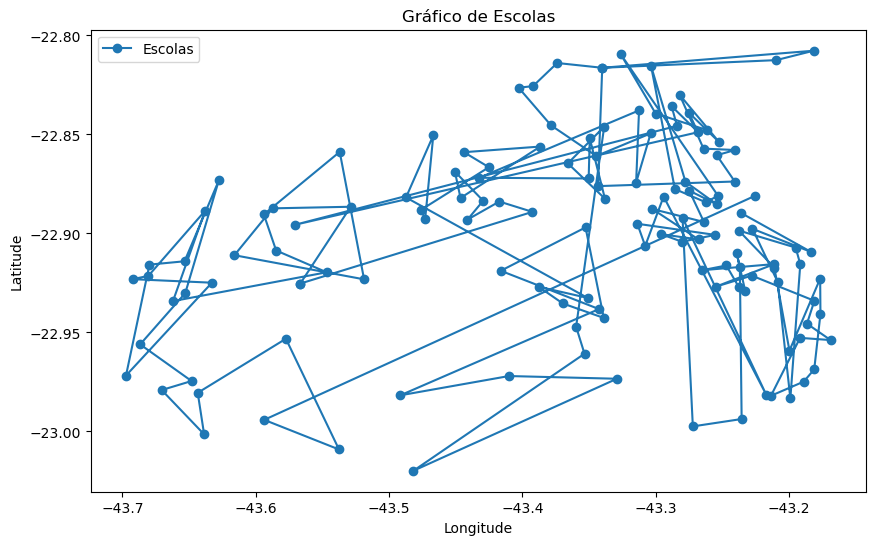

In [ ]:
# Plotagem


dados_finais = pd.read_csv('dados_finais_ordenados.csv')

# Pontos de latitude e longitude da ordem natural
pontos_ordem_natural = dados_finais[['lat', 'lon']]

# pontos no plano cartesiano
plt.figure(figsize=(10, 6))
plt.plot(pontos_ordem_natural['lon'], pontos_ordem_natural['lat'], 'o-', label='Escolas')  # Todas as escolas

plt.title('Gráfico de Escolas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Exibir o gráfico
plt.show()
